Shape of TF-IDF features: (1438, 100)


/home/muthukumar/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Silhouette Score: 0.14
KMeans Calinski-Harabasz Index: 110.09
Clustering model saved successfully.


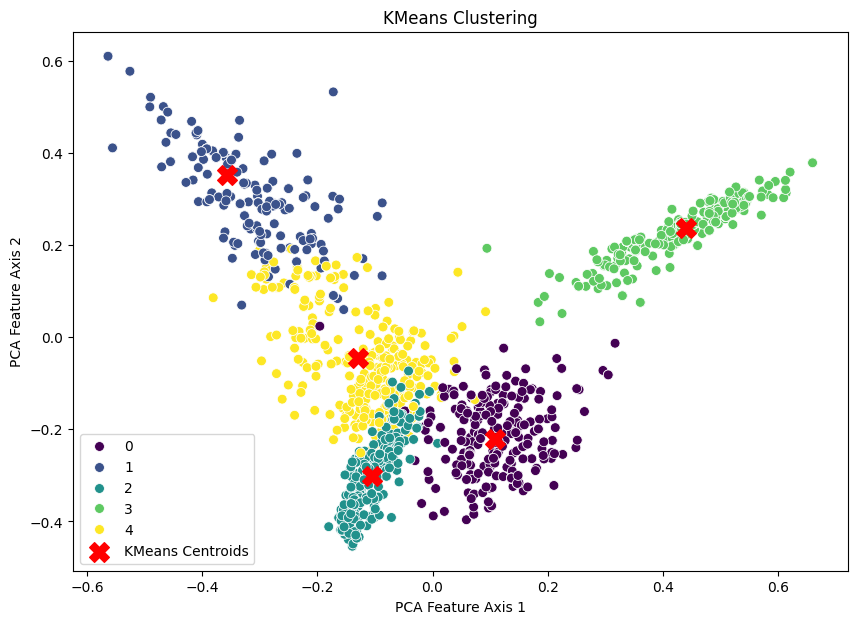

In [1]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os

# Load the dataset
file = os.getenv('DATA_SET_PATH')

if file and os.path.exists(file):
    df = pd.read_csv(file)

    feature_column = "ProductName" 
    if feature_column not in df.columns:
        print(f"The required column '{feature_column}' is missing in the dataset.")
        os._exit(1)

    df[feature_column] = df[feature_column].fillna("Unknown")

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
    feature_vectors = vectorizer.fit_transform(df[feature_column].values.astype('U')).toarray()

    print(f"Shape of TF-IDF features: {feature_vectors.shape}")

    # Train KMeans Clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(feature_vectors)

    # Evaluate the Model
    silhouette = silhouette_score(feature_vectors, kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(feature_vectors, kmeans.labels_)

    print(f"KMeans Silhouette Score: {silhouette:.2f}")
    print(f"KMeans Calinski-Harabasz Index: {calinski_harabasz:.2f}")

    # Save the clustering model only
    cluster_path_kmeans = "../models/pkl/kmeans_model.pkl"
    vectorizer_path_kmeans = "../models/pkl/vectorizer_model.pkl"

    os.makedirs(os.path.dirname(cluster_path_kmeans), exist_ok=True)
    with open(cluster_path_kmeans, 'wb') as f:
        pickle.dump(kmeans, f)
    with open(vectorizer_path_kmeans, 'wb') as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)

    print("Clustering model saved successfully.")

    # Visualize Clusters
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(feature_vectors)

    # Transform cluster centers to the reduced PCA space for better visualization
    reduced_cluster_centers_kmeans = pca.transform(kmeans.cluster_centers_)

    # Scatter plot of the KMeans clusters
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans.labels_, palette='viridis', s=50, legend='full')
    plt.scatter(reduced_cluster_centers_kmeans[:, 0], reduced_cluster_centers_kmeans[:, 1], c='red', marker='X', s=200, label='KMeans Centroids')
    plt.title('KMeans Clustering')
    plt.xlabel('PCA Feature Axis 1')
    plt.ylabel('PCA Feature Axis 2')
    plt.legend()
    plt.show()

else:
    print("File does not exist. Please check the file path.")
    os._exit(1)
